In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# What is happening here?

In [3]:
from glob import glob

msk_paths = glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
img_paths = [m.replace('_mask','') for m in msk_paths]

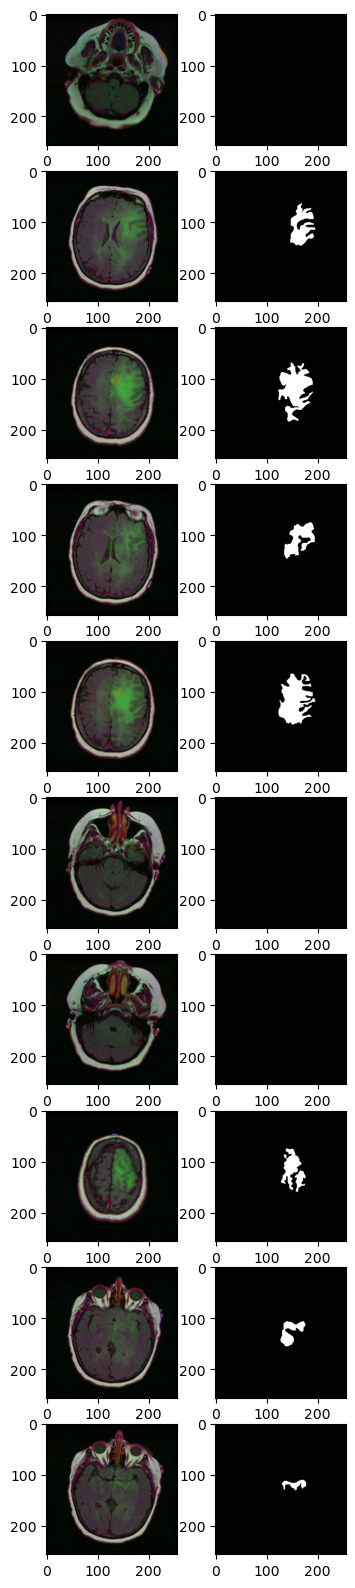

In [4]:
import cv2

rows, colayers = 10, 2

fig = plt.figure(figsize = (4, 20))
for i in range(1, rows*colayers, 2):
    
    fig.add_subplot(rows, colayers, i)
    img = cv2.imread(img_paths[i])
    plt.imshow(img)

    fig.add_subplot(rows, colayers, i+1)
    msk = cv2.imread(msk_paths[i])
    plt.imshow(msk)


In [8]:
mri_df = pd.DataFrame({'img':img_paths,
                       'msk':msk_paths})
mri_df.head()

,img,msk
0,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
1,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
2,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...


In [9]:
from sklearn.model_selection import train_test_split

mri_df_train, mri_df_test = train_test_split(mri_df, test_size = 0.1,random_state=77_47)
mri_df_train, mri_df_val = train_test_split(mri_df_train, test_size = 0.1,random_state=77_47)

In [10]:
mri_df_train

,img,msk
460,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...
954,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
1201,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
1784,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
1135,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
...,...,...
303,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...
24,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
184,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3226,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...


In [11]:
mri_df_train = mri_df_train.reset_index(drop=True)
mri_df_val = mri_df_val.reset_index(drop=True)
mri_df_test = mri_df_test.reset_index(drop=True)

In [12]:
mri_df_train

,img,msk
0,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...
1,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
2,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
3,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
...,...,...
3177,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...
3178,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3179,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3180,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...


In [13]:
print(mri_df_train.shape,
      mri_df_val.shape,
      mri_df_test.shape)

(3182, 2) (354, 2) (393, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

batch_size = 8
train_generator = train_datagen.flow_from_dataframe(
    dataframe=mri_df_train,
    directory=src_path_train,
    x_col="img_code",
    y_col="target",
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=mri_df_val,
    x_col="img_code",
    y_col="target",
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=src_path_test,
    x_col="img_code",
    target_size=(100, 100),
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

In [16]:
from keras.preprocessing.image import ImageDataGenerator


BATCH_SIZE = 32

def transformator(df,
                  rotation_range=0.2,
                  width_shift_range=0.02,
                  height_shift_range=0.02,
                  shear_range=0.1,
                  zoom_range=0.1,
                  horizontal_flip=True,
                  IMG_SIZE_TRAIN = (128,128),
                  BATCH_SIZE = 32):

    img_datag = ImageDataGenerator(
            rotation_range=rotation_range,
            width_shift_range=width_shift_range,
            height_shift_range=height_shift_range,
            shear_range=shear_range,
            zoom_range=zoom_range,
            horizontal_flip=True,
            fill_mode='nearest')

    msk_datag = ImageDataGenerator(
            rotation_range=rotation_range,
            width_shift_range=width_shift_range,
            height_shift_range=height_shift_range,
            shear_range=shear_range,
            zoom_range=zoom_range,
            horizontal_flip=True,
            fill_mode='nearest')

    img_generated = img_datag.flow_from_dataframe(
                  df,
                  x_col = 'img',
                  class_mode = None,
                  color_mode = 'rgb',
                  target_size = IMG_SIZE_TRAIN,
                  batch_size = BATCH_SIZE,
                  save_to_dir = None,
                  save_prefix = 'image',
                  seed = 777447)

    msk_generated = msk_datag.flow_from_dataframe(
                  df,
                  x_col='msk',
                  class_mode=None,
                  color_mode='grayscale',
                  target_size=IMG_SIZE_TRAIN,
                  batch_size=BATCH_SIZE,
                  save_to_dir=None,
                  save_prefix='mask',
                  seed=777447)

    generated = zip(img_generated, msk_generated)

    for img, msk in generated:
        img = img / 255
        msk = msk / 255

        msk[msk > 0.5] = 1
        msk[msk <= 0.5] = 0

        yield (img,msk)

data_train = transformator(mri_df_train)
data_val = transformator(mri_df_val)
data_test = transformator(mri_df_test)

# Use glob to load the data

# Use the figure provided -'model.png' and make the architecture 

In [17]:
import keras.layers as layers
import keras

inp = layers.Input((128,128,3))

c1 = layers.Conv2D(32, (3, 3),padding='same')(inp)
b1 = layers.Activation('relu')(c1)
c1 = layers.Conv2D(32, (3, 3), padding='same')(b1)
b1 = layers.BatchNormalization(axis=3)(c1)
b1 = layers.Activation('relu')(b1)
p1 = layers.MaxPooling2D(pool_size=(2, 2))(b1)

c2 = layers.Conv2D(64, (3,3),padding='same')(p1)
b2 = layers.Activation('relu')(c2)
c2 = layers.Conv2D(64, (3, 3), padding='same')(b2)
b2 = layers.BatchNormalization(axis=3)(c2)
b2 = layers.Activation('relu')(b2)
p2 = layers.MaxPooling2D(pool_size=(2, 2))(b2)

c3 = layers.Conv2D(128, (3,3),padding='same')(p2)
b3 = layers.Activation('relu')(c3)
c3 = layers.Conv2D(128, (3, 3), padding='same')(b3)
b3 = layers.BatchNormalization(axis=3)(c3)
b3 = layers.Activation('relu')(b3)
p3 = layers.MaxPooling2D(pool_size=(2, 2))(b3)

c4 = layers.Conv2D(256, (3,3),padding='same')(p3)
b4 = layers.Activation('relu')(c4)
c4 = layers.Conv2D(256, (3, 3), padding='same')(b4)
b4 = layers.BatchNormalization(axis=3)(c4)
b4 = layers.Activation('relu')(b4)
p4 = layers.MaxPooling2D(pool_size=(2, 2))(b4)

c5 = layers.Conv2D(512, (3,3),padding='same')(p4)
b5 = layers.Activation('relu')(c5)
c5 = layers.Conv2D(512, (3, 3), padding='same')(b5)
b5 = layers.BatchNormalization(axis=3)(c5)
b5 = layers.Activation('relu')(b5)
p5 = layers.MaxPooling2D(pool_size=(2, 2))(b5)

u6 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b5), c4], axis=3)
c6 = layers.Conv2D(256, (3, 3), padding='same')(u6)
b6 = layers.Activation('relu')(c6)
c6 = layers.Conv2D(256, (3, 3), padding='same')(b6)
b6 = layers.BatchNormalization(axis=3)(c6)
b6 = layers.Activation('relu')(b6)

u7 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b6), c3], axis=3)
c7 = layers.Conv2D(128, (3, 3), padding='same')(u7)
b7 = layers.Activation('relu')(c7)
c7 = layers.Conv2D(128, (3, 3), padding='same')(b7)
b7 = layers.BatchNormalization(axis=3)(c7)
b7 = layers.Activation('relu')(b7)

u8 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b7), c2], axis=3)
c8 = layers.Conv2D(64, (3, 3), padding='same')(u8)
b8 = layers.Activation('relu')(c8)
c8 = layers.Conv2D(64, (3, 3), padding='same')(b8)
b8 = layers.BatchNormalization(axis=3)(c8)
b8 = layers.Activation('relu')(b8)

u9 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(b8), c1], axis=3)
c9 = layers.Conv2D(32, (3, 3), padding='same')(u9)
b9 = layers.Activation('relu')(c9)
c9 = layers.Conv2D(32, (3, 3), padding='same')(b9)
b9 = layers.BatchNormalization(axis=3)(c9)
b9 = layers.Activation('relu')(b9)

c10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(b9)

model = keras.Model(inputs=[inp],
                    outputs=[c10])

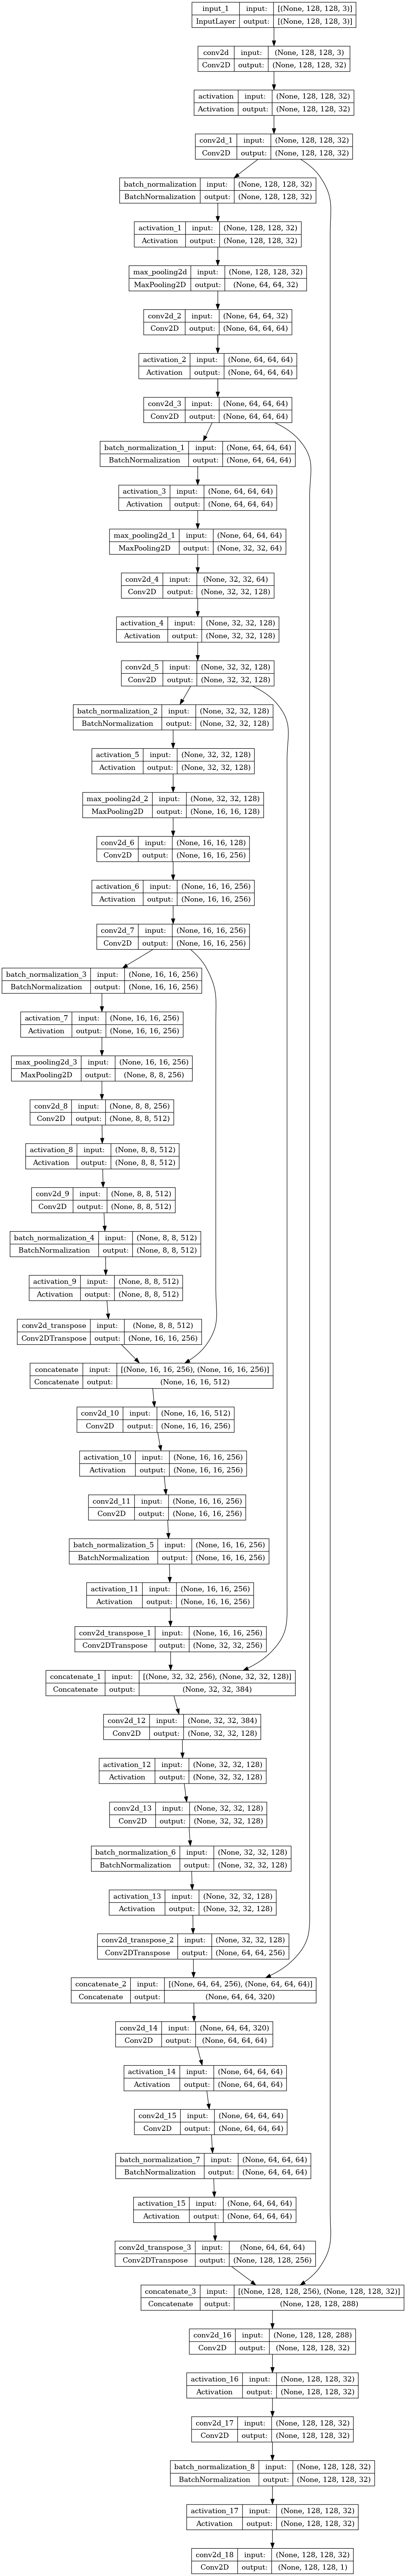

In [15]:
keras.utilayers.plot_model(model,show_shapes=True)

In [18]:
import keras.backend as K

smooth=100

def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)

    intersec = K.sum(y_true * y_pred)
    mod_sum = K.sum(y_true) + K.sum(y_pred)

    return (2 * intersec + smooth) / (mod_sum + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)



# Write the code of IOU

In [24]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = iou_loss,
              metrics=["binary_accuracy", iou, dice_coef])


history = model.fit(data_train,
                    steps_per_epoch=(len(mri_df_train) / BATCH_SIZE),
                    epochs=60,
                    callbacks=[ModelCheckpoint('unet_128_mri_seg.hdf5', verbose=1, save_best_only=True)],
                    validation_data = data_val,
                    validation_steps=len(mri_df_val) / BATCH_SIZE)

Epoch 1/60
100/99 [==============================] - ETA: 0s - loss: -0.0417 - binary_accuracy: 0.9689 - iou: 0.0415 - dice_coef: 0.0787
Epoch 1: val_loss improved from inf to -0.01710, saving model to unet_128_mri_seg.hdf5
99/99 [==============================] - 41s 394ms/step - loss: -0.0417 - binary_accuracy: 0.9689 - iou: 0.0415 - dice_coef: 0.0787 - val_loss: -0.0171 - val_binary_accuracy: 0.9896 - val_iou: 0.0206 - val_dice_coef: 0.0383
Epoch 2/60
100/99 [==============================] - ETA: 0s - loss: -0.0454 - binary_accuracy: 0.9749 - iou: 0.0452 - dice_coef: 0.0854
Epoch 2: val_loss improved from -0.01710 to -0.03336, saving model to unet_128_mri_seg.hdf5
99/99 [==============================] - 38s 386ms/step - loss: -0.0454 - binary_accuracy: 0.9749 - iou: 0.0452 - dice_coef: 0.0854 - val_loss: -0.0334 - val_binary_accuracy: 0.9912 - val_iou: 0.0332 - val_dice_coef: 0.0619
Epoch 3/60
100/99 [==============================] - ETA: 0s - loss: -0.0533 - binary_accuracy: 0.9

In [25]:
results = model.evaluate(data_test, steps=len(mri_df_test) / BATCH_SIZE)

12/12 [==============================] - 3s 296ms/step - loss: -0.7997 - binary_accuracy: 0.9978 - iou: 0.8021 - dice_coef: 0.8886


In [26]:
results

[-0.7996562123298645, 0.9977918863296509, 0.8021432161331177, 0.88863605260849]

In [27]:
print("Test loss: ",round(results[0],3),
      "Test Binary Accuracy: ",round(results[1],3),
      "Test IOU: ",round(results[2],3),
      "Test Dice Coefficent: ",round(results[3],3))

Test loss:  -0.8 Test Binary Accuracy:  0.998 Test IOU:  0.802 Test Dice Coefficent:  0.889


1/1 [==============================] - 0s 367ms/step


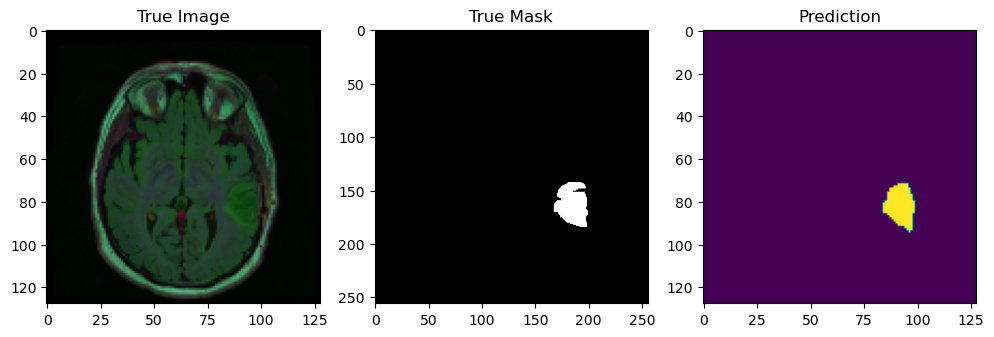

1/1 [==============================] - 0s 25ms/step


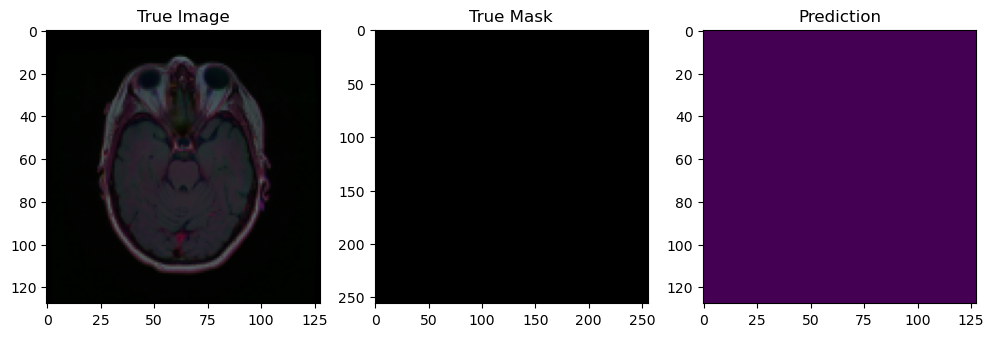

1/1 [==============================] - 0s 29ms/step


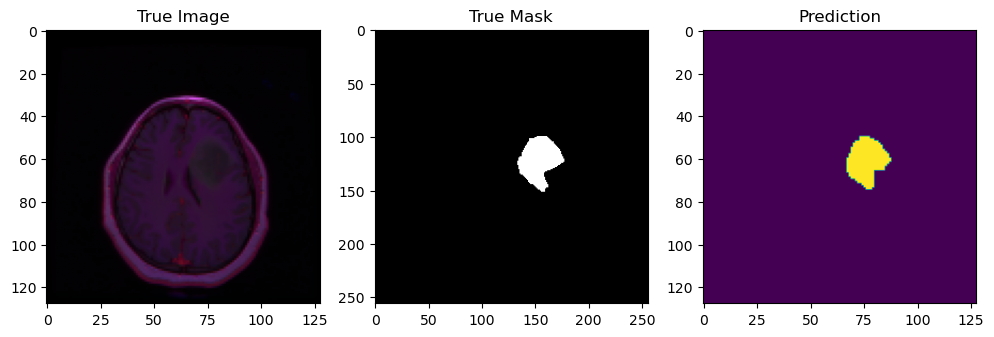

1/1 [==============================] - 0s 24ms/step


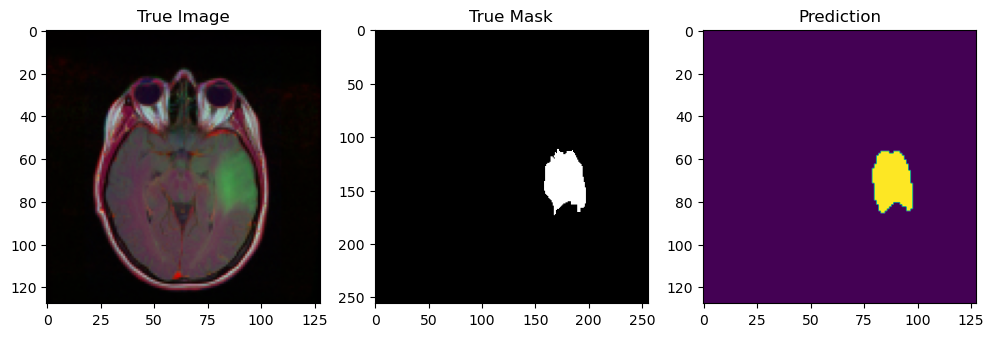

1/1 [==============================] - 0s 23ms/step


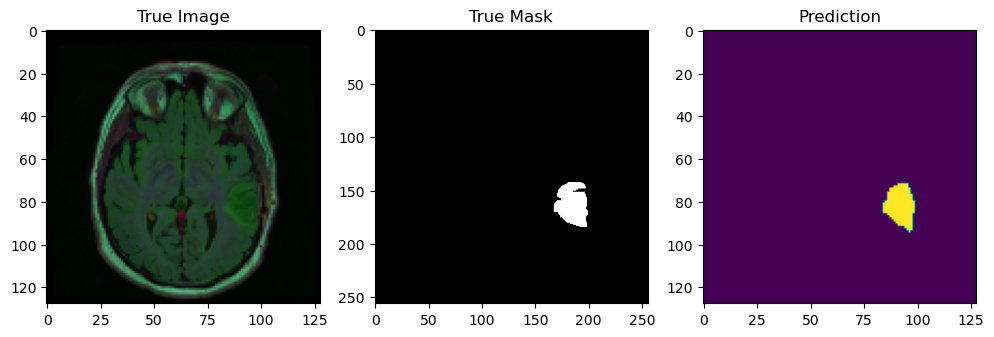

1/1 [==============================] - 0s 25ms/step


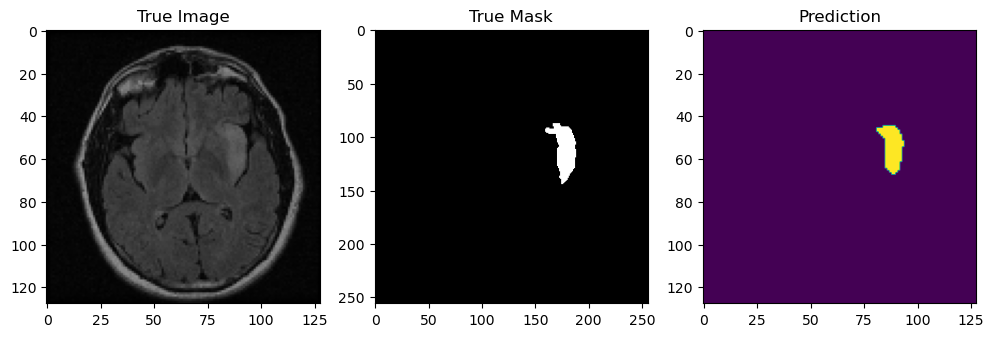

1/1 [==============================] - 0s 24ms/step


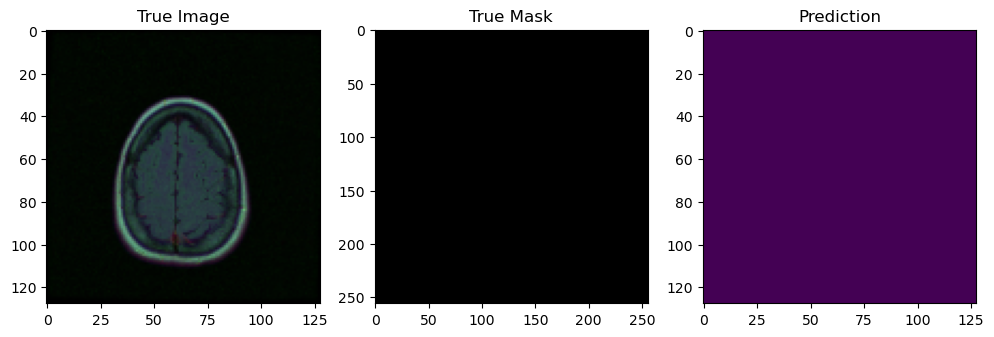

1/1 [==============================] - 0s 24ms/step


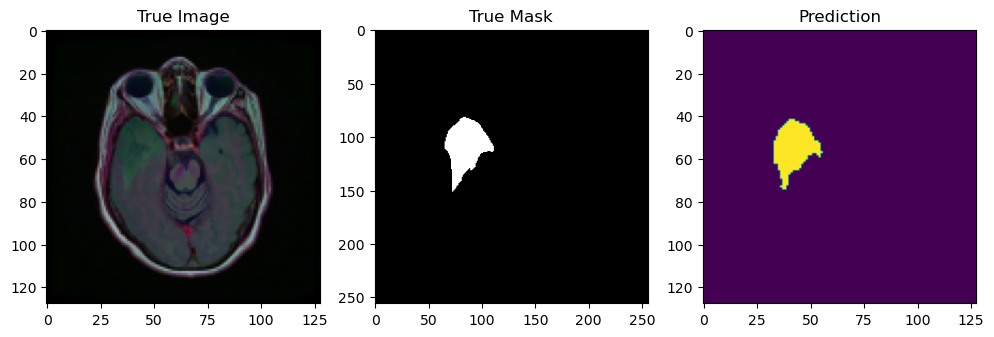

1/1 [==============================] - 0s 22ms/step


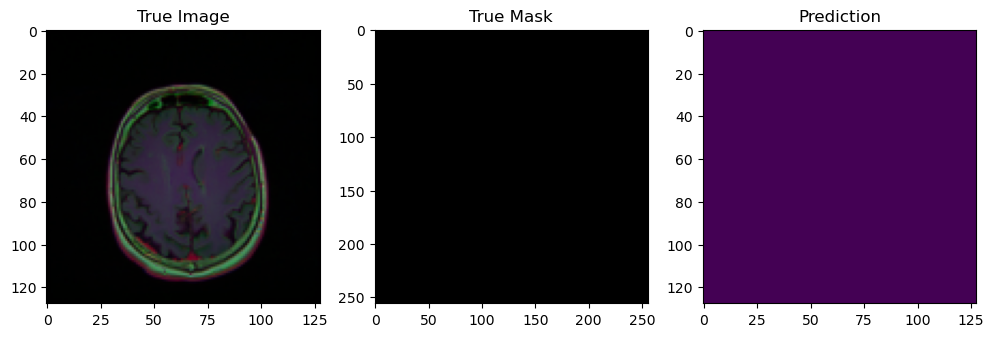

1/1 [==============================] - 0s 22ms/step


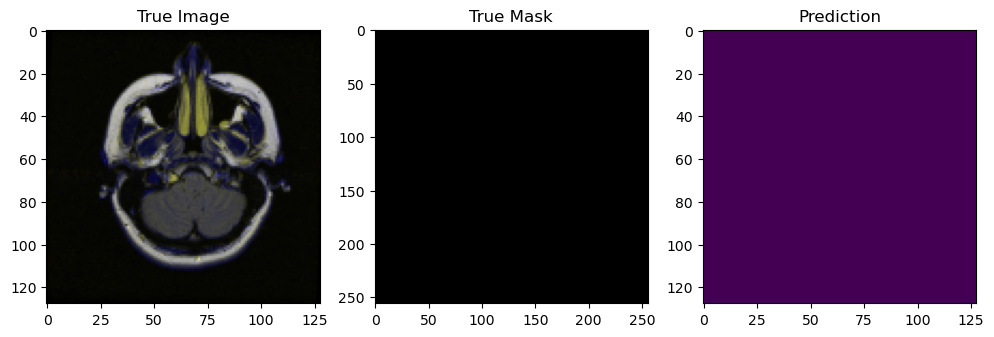

1/1 [==============================] - 0s 23ms/step


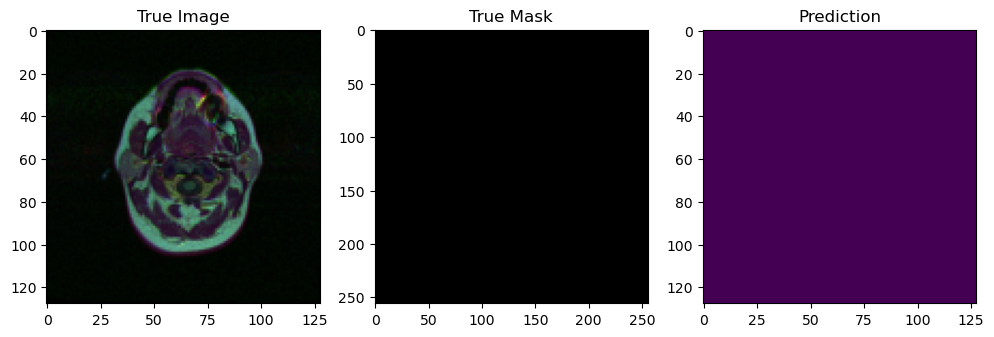

1/1 [==============================] - 0s 24ms/step


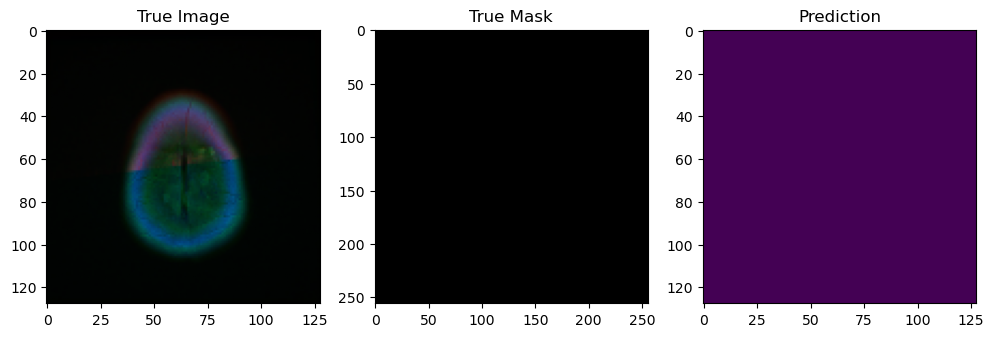

1/1 [==============================] - 0s 25ms/step


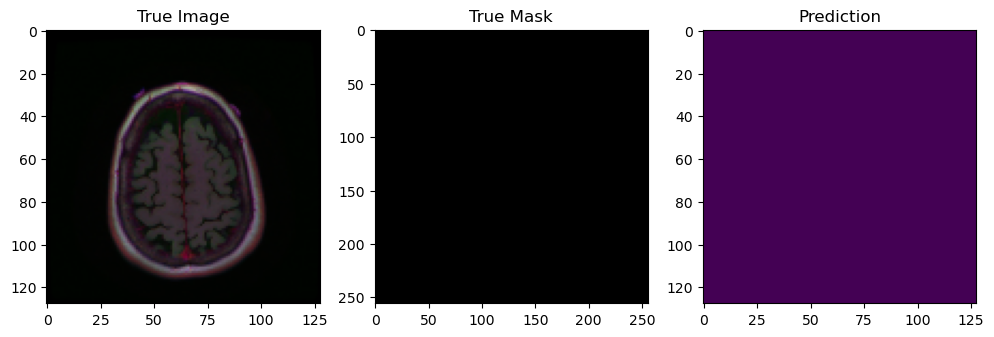

1/1 [==============================] - 0s 40ms/step


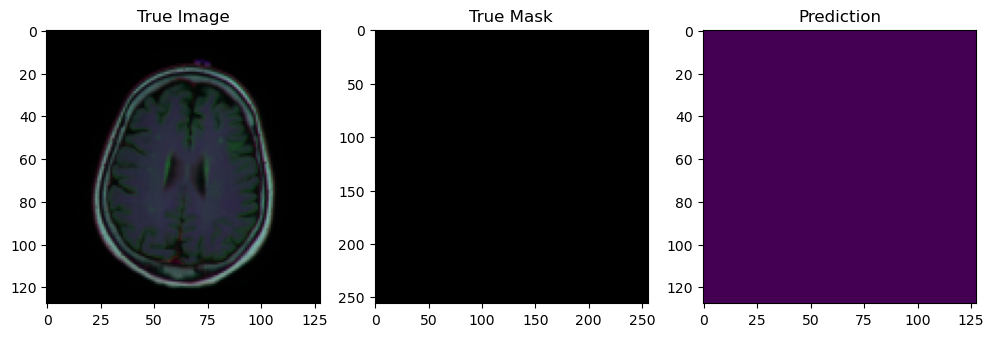

1/1 [==============================] - 0s 33ms/step


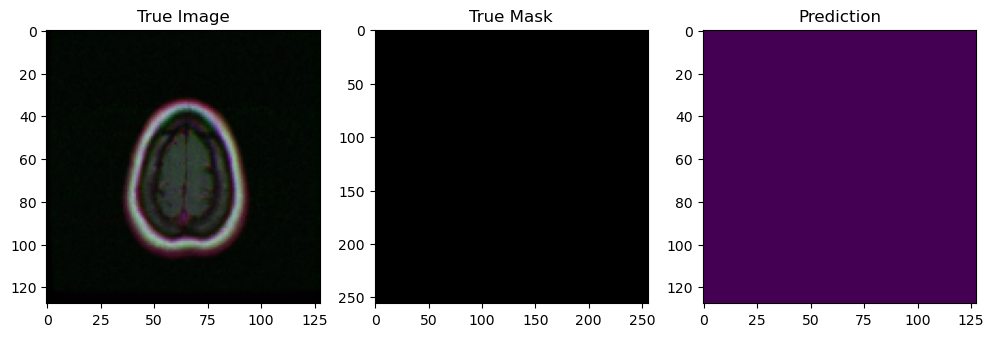

1/1 [==============================] - 0s 24ms/step


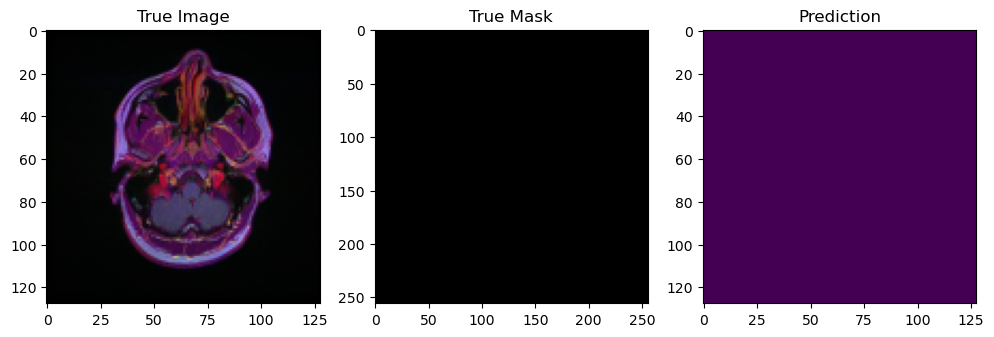

1/1 [==============================] - 0s 24ms/step


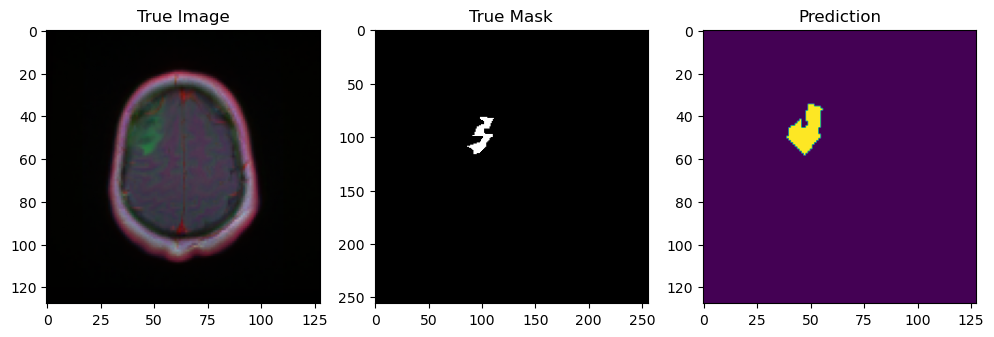

1/1 [==============================] - 0s 22ms/step


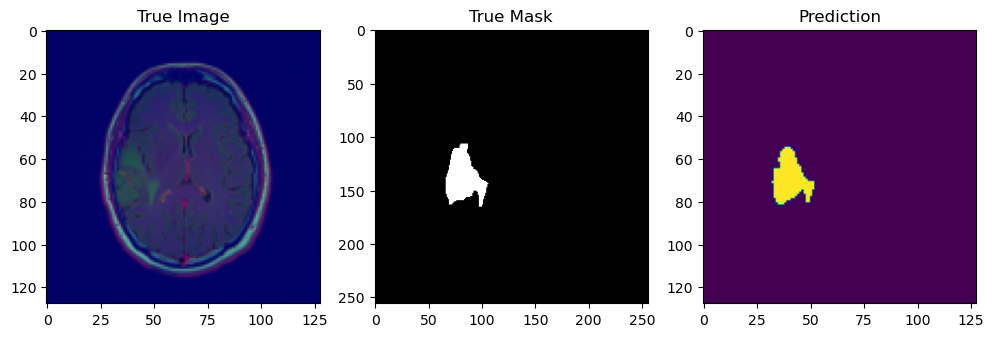

1/1 [==============================] - 0s 23ms/step


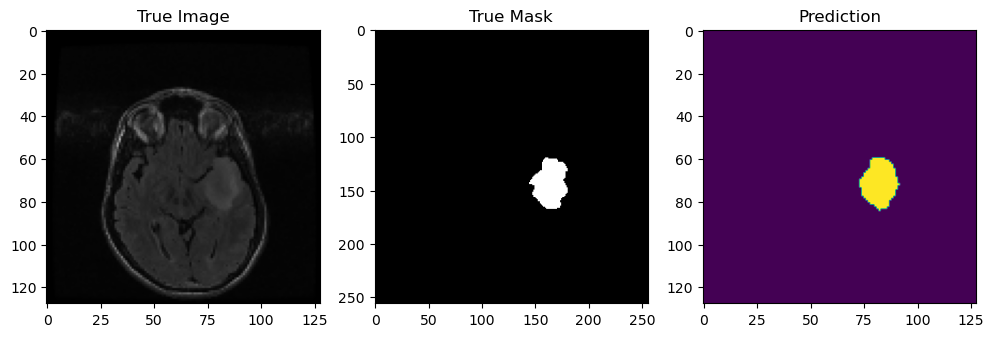

1/1 [==============================] - 0s 23ms/step


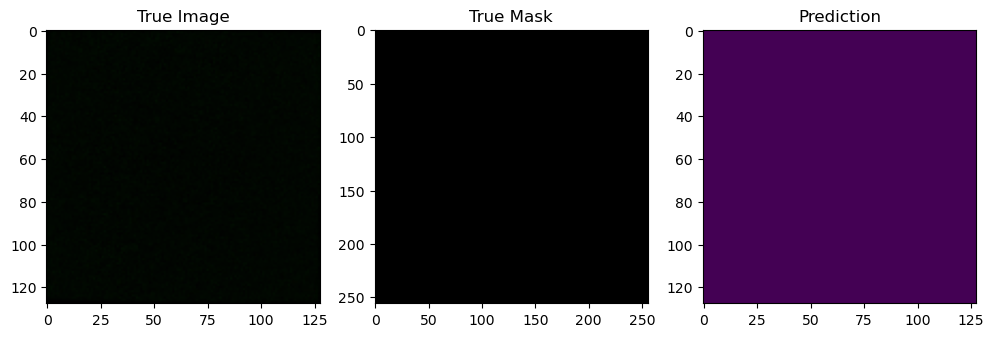

In [28]:
for i in range(20):
    index=np.random.randint(1,len(mri_df_test.index))
    img = cv2.imread(mri_df_test['img'].iloc[index])
    img = cv2.resize(img ,(128, 128))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('True Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(mri_df_test['msk'].iloc[index])))
    plt.title('True Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()

In [ ]:
def iou(y_true, y_pred):
    intersec = K.sum(y_true * y_pred)
    comb_area = K.sum(y_true + y_pred) - intersec

    return (intersec + smooth) / (comb_area + smooth)

def iou_loss(y_true, y_pred):
    return - iou(y_true, y_pred)